# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Изучим столбцы отдельно друг от друга, опираясь на выше полученную общую информацию по ним. Начнём со столбца **total_images**

In [4]:
data['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

Данные выглядят довольно адекватно: минимальное число фотографий - 0, максимальное - 50. Плюс выбран верный тип int для столбца с целочисленными значениями, да и в этом столбце нет пропусков - можно пока что сказать, что в каких-то изменениях этот столбец не нуждается и в нём данные хорошие

Изучим столбец с последней стоимостью квартиры перед продажей - **last_price**

In [5]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

как видно, разброс идет между минимальным и максимальным значением на целые порядки. в таком формате данные довольно неудобно воспринимать - предлагаю для более интуитивно понятной работы перевести всю стоимость в миллионы, а не сырые значения. сократив число порядков значений станет попроще понимать о каких числах идёт речь. (допустим, что единица измерения - рубли)

In [6]:
data['last_price_millions'] = data['last_price']/1000000
del data['last_price']
data['last_price_millions'].describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price_millions, dtype: float64

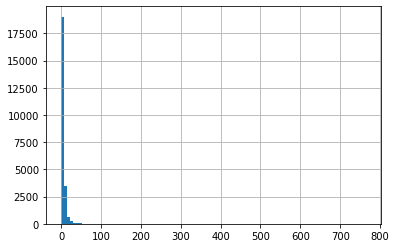

In [7]:
data['last_price_millions'].hist(bins=100)

как видно, практически весь диапазон значений лежит от "0" - очень маленьких цен продаж, до примерно 50 млн. рублей - выделим этот диапазон при следующем построении гистрограммы

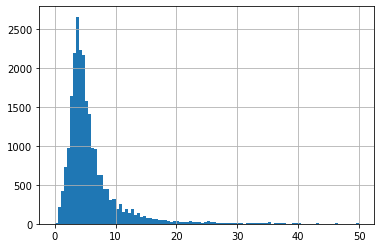

In [8]:
data['last_price_millions'].hist(bins=100, range=(0,50))

глядя на данную гистограмму предлагаю выделить исследуемый диапазон от 1 до 25 млн рублей - так мы исключим слишком малые и слишком большие значения в данных о стоимости проданных квартир, получив более качественный резульат исследования

In [9]:
old_size = data.shape[0]
data = data.query('1 <= last_price_millions <= 25').reset_index(drop=True)
new_size = data.shape[0]
saved_data = (new_size/old_size)*100
print(f'Осталось данных от изначального объёма после фильтрации:{saved_data} %')

Осталось данных от изначального объёма после фильтрации:97.09270433351618 %


потерян лишь небольшой процент данных, но зато теперь они избавлены от выбросов и мы можем получить более качественный результат исследования. теперь изучим столбец **total_area** - площадь квартиры в квадратных метрах

In [10]:
data['total_area'].describe()

count    23010.000000
mean        57.770182
std         26.661480
min         12.000000
25%         40.000000
50%         51.500000
75%         68.000000
max        460.800000
Name: total_area, dtype: float64

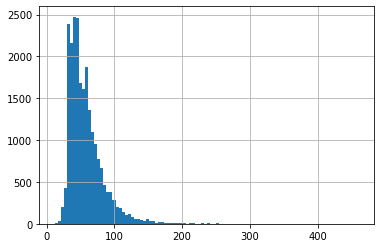

In [11]:
data['total_area'].hist(bins=100)

здесь так же видим по гистограмме, что можно отрезать некоторую часть данных, отнеся их к выбросам. минимальное значение в 12 м2 не так уж сильно выбивается из общей массы, но вот "хвост" из слишком больших значений площади можно отрезать. пусть в исследование войдут квартиры, у которых жилая площадь не более 150 м2

In [12]:
old_size = data.shape[0]
data = data.query('total_area <= 150').reset_index(drop=True)
new_size = data.shape[0]
saved_data = (new_size/old_size)*100
print(f'Осталось данных от изначального объёма после фильтрации:{saved_data} %')

Осталось данных от изначального объёма после фильтрации:98.82659713168188 %


как видим, опять же потерялм совсем малую часть данных

теперь рассмотрим столбец **first_day_exposition** - его явно можно будет перевести в формат даты. так же время продажи вряд ли стоит рассматривать вплоть до часов (судя по таблице во многих строках, если не во всех, там вообще указаны нули) - для отбрасывания лишней части данных округлим результат преобразования до дней 

In [13]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S').dt.round('1D')

In [14]:
display(data)

,total_images,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_millions
0,20,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,13.000
1,7,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,3.350
2,10,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,5.196
3,2,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,10.000
4,10,30.40,2018-09-10,1,NaN,12.0,14.4,5,NaN,False,...,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,2.890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22735,9,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,...,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,9.700
22736,14,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,False,...,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,3.100
22737,18,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,False,...,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500
22738,13,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,False,...,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,11.475


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22740 entries, 0 to 22739
Data columns (total 22 columns):
total_images            22740 non-null int64
total_area              22740 non-null float64
first_day_exposition    22740 non-null datetime64[ns]
rooms                   22740 non-null int64
ceiling_height          13922 non-null float64
floors_total            22655 non-null float64
living_area             20964 non-null float64
floor                   22740 non-null int64
is_apartment            2674 non-null object
studio                  22740 non-null bool
open_plan               22740 non-null bool
kitchen_area            20589 non-null float64
balcony                 11754 non-null float64
locality_name           22693 non-null object
airports_nearest        17448 non-null float64
cityCenters_nearest     17466 non-null float64
parks_around3000        17467 non-null float64
parks_nearest           7574 non-null float64
ponds_around3000        17467 non-null float64
ponds_n

как видно, преобразование прошло успешно

In [16]:
data['first_day_exposition'].describe()

count                   22740
unique                   1487
top       2018-02-01 00:00:00
freq                      355
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

как видно, среди значений нет каких-то аномальных дат, и данный столбец можно уже считать вполне прилично выглядящим

теперь рассмотрим столбец со значением числа комнат - **rooms**

In [17]:
data['rooms'].describe()

count    22740.000000
mean         1.996702
std          0.949278
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

In [18]:
data['rooms'].value_counts()

1    7938
2    7807
3    5600
4     990
0     195
5     177
6      24
7       8
8       1
Name: rooms, dtype: int64

значения 0, 6, 7 и 8 - выглядят довольно странно для числа комнат, да и представлеы в очень малом кол-ве. однако возможно они как-то связаны с квартирами со свободной планировкой, апартаментами или квартирами-студиями. выделим эти квартиры в отдельный дата-фрейм. если такая зависимость обнаружится, то как мне кажется резонно будет оставить эти значения, с точки зрения клиентоориентированности и сохранения уникальных данных. однако если какой-то прямой зависимости не будет между этими параметрами, то предлагаю просто удалить эти строки, так как их очень малое число, и без резонного объяснения такого числа комнат их нет смысла хранить, портя "адекватность" значений в этом столбце

так как по изначальному анализу данных помним, что столбец **is_apartment** - с пропусками, проведем для него попутно так же анализ

In [19]:
data['is_apartment'].value_counts()

False    2632
True       42
Name: is_apartment, dtype: int64

логично предположить, что пропущенные значения в данном столбце - это так же False - то есть, квартиры, не являющиеся аппартаментами. заполним этим значением пропуски

In [20]:
data['is_apartment'] = data['is_apartment'].fillna(False) 

In [21]:
strange_rooms = [0, 6, 7, 8]
data_strange_rooms = data.query('rooms in @strange_rooms').reset_index(drop=True)
display(data_strange_rooms)

,total_images,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_millions
0,20,136.00,2017-09-22,6,3.0,2.0,94.00,2,False,False,...,1.0,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN,11.795
1,1,27.00,2017-03-30,0,NaN,24.0,15.50,2,False,True,...,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,2.450
2,5,123.10,2015-11-12,6,3.2,5.0,89.00,2,False,False,...,NaN,Санкт-Петербург,26009.0,3369.0,2.0,516.0,0.0,NaN,992.0,10.880
3,4,25.00,2017-09-27,0,NaN,14.0,17.00,1,False,False,...,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,2.320
4,8,27.11,2018-03-12,0,NaN,17.0,24.75,4,False,True,...,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,2.480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,7,26.00,2017-09-01,0,NaN,25.0,18.00,16,False,True,...,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0,3.200
224,0,27.70,2017-09-28,0,NaN,24.0,18.00,4,False,False,...,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.500
225,15,26.00,2018-09-07,0,NaN,19.0,NaN,8,False,True,...,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0,3.350
226,10,29.00,2017-11-11,0,NaN,9.0,18.00,8,False,False,...,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0,1.450


In [22]:
data_strange_rooms.pivot_table(index='rooms', values=['is_apartment', 'studio', 'open_plan'])

,is_apartment,open_plan,studio
rooms,,,
0,0.000,0.297436,0.702564
6,0.000,0.000000,0.000000
7,0.125,0.000000,0.000000
8,0.000,0.000000,0.000000


если я ничего не путаю, то получисло сделать интересный вывод - квартиры с 0 комнат это полностью либо квартиры со свободной планировкой (около 30 %) , либо квартиры-студии (около 70%) - то есть это действительно обоснованное число комнат, вероятно проставленное клиентом из-за специфики его квартиры, а не какая-то ошибка. строки с 0 комнат явно можно оставить. а вот комнаты 6, 7, 8 - никак не подкреплены никакими спецификами планировки, и их можно списать на аномальные значения, записанне возможно по ошибке, тем более, что их суммарно около 30 штук, как показал ранее анализ через *value_counts* - считанные единицы из общего датафрейма, отсутствие которых фактически никак не скажется на общей картине

In [23]:
old_size = data.shape[0]
strange_rooms = [6, 7, 8]
data = data.query('rooms not in @strange_rooms').reset_index(drop=True)
new_size = data.shape[0]
saved_data = (new_size/old_size)*100
print(f'Осталось данных от изначального объёма после фильтрации:{saved_data} %')

Осталось данных от изначального объёма после фильтрации:99.85488126649076 %


теперь изучим столбец **ceiling_height**

In [24]:
data['ceiling_height'].describe()

count    13898.000000
mean         2.755945
std          1.282252
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

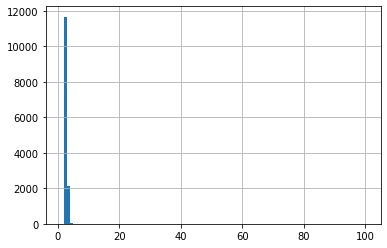

In [25]:
data['ceiling_height'].hist(bins=100)

как видно, в данном столбце так же есть заметные выбросы. рассмотрим диапазон значений высоты потолка от 1 метра до 4 метров, чтобы выделить группу значений, с которыми стоит работать

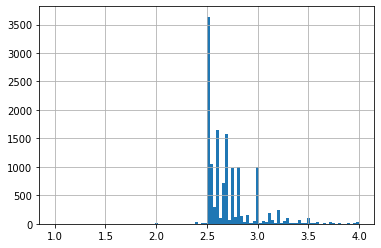

In [26]:
data['ceiling_height'].hist(bins=100, range=(1,4))

как видно, практически все значения лежат в диапазоне от 2.5 до 4 - всё остальное как с точки зрения логики, так и по наличию в таблице - скорее относится к выбросам, которые можно удалить из общего набора данных. остаётся только вопрос как поступить с пропущенными значениями. в явном виде сказать от чего зависит высота потолка сложно - это довольно независимый фактор, как по мне, но может быть удасться заметить корреляцию с каким-то из других столбцов всё же:

In [27]:
data.corr()

,total_images,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_millions
total_images,1.000000,0.118196,0.092667,-0.007336,0.014193,0.103289,0.032986,0.010451,-0.028926,-0.023350,0.086609,0.124774,-0.000459,-0.038919,0.008497,-0.003514,-0.021082,0.003087,-0.032720,0.160071
total_area,0.118196,1.000000,0.791486,0.072168,-0.042660,0.916943,-0.029090,0.012135,-0.103116,-0.062991,0.523664,0.108660,-0.020326,-0.205841,0.114490,0.022138,0.134094,-0.056918,0.149295,0.762972
rooms,0.092667,0.791486,1.000000,0.026526,-0.227897,0.878392,-0.166087,-0.008437,-0.165915,-0.100792,0.134263,0.037494,-0.050052,-0.129619,0.087182,-0.037798,0.053118,-0.020863,0.105796,0.463472
ceiling_height,-0.007336,0.072168,0.026526,1.000000,-0.021961,0.062746,-0.009114,0.161487,0.002601,0.043458,0.069869,0.045282,-0.020607,-0.078476,0.053321,-0.014509,0.072215,-0.054418,0.011069,0.100777
floors_total,0.014193,-0.042660,-0.227897,-0.021961,1.000000,-0.174569,0.675212,-0.023358,0.070331,0.051585,0.244953,0.191801,0.105487,0.001848,-0.243416,0.093518,-0.113228,0.031826,-0.047602,0.098459
living_area,0.103289,0.916943,0.878392,0.062746,-0.174569,1.000000,-0.123989,0.007500,-0.070639,-0.041779,0.249682,0.061030,-0.051780,-0.190489,0.130809,-0.024017,0.106328,-0.035879,0.130766,0.634988
floor,0.032986,-0.029090,-0.166087,-0.009114,0.675212,-0.123989,1.000000,-0.012779,0.037265,0.036525,0.176066,0.164666,0.069012,0.003054,-0.159150,0.071525,-0.072562,0.024448,-0.039259,0.083907
is_apartment,0.010451,0.012135,-0.008437,0.161487,-0.023358,0.007500,-0.012779,1.000000,-0.003445,-0.002279,0.022784,0.050483,0.021442,0.016983,0.004131,-0.024297,0.012488,0.006410,-0.003046,0.018184
studio,-0.028926,-0.103116,-0.165915,0.002601,0.070331,-0.070639,0.037265,-0.003445,1.000000,-0.004340,NaN,0.033001,-0.022506,-0.009822,-0.029286,0.008661,0.003065,0.000886,-0.021614,-0.057917
open_plan,-0.023350,-0.062991,-0.100792,0.043458,0.051585,-0.041779,0.036525,-0.002279,-0.004340,1.000000,NaN,0.021177,-0.013963,-0.003760,-0.012301,0.010810,0.006915,-0.002847,-0.023729,-0.038938


как и ожидалось, особой корреляции с другими параметрами у данного столбца нету, но поскольку пропусков там довольно большое число и просто так их не хочется отбрасывать - просто заполним их средним значением из выше проведенного исследования

In [28]:
average_height = data['ceiling_height'].mean()
data['ceiling_height'] = data['ceiling_height'].fillna(average_height)

In [29]:
old_size = data.shape[0]
data = data.query('2 <= ceiling_height <= 4').reset_index(drop=True)
new_size = data.shape[0]
saved_data = (new_size/old_size)*100
print(f'Осталось данных от изначального объёма после фильтрации:{saved_data} %')

Осталось данных от изначального объёма после фильтрации:99.73136037345311 %


In [30]:
data.isna().sum()

total_images                0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               84
living_area              1771
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2138
balcony                 10929
locality_name              47
airports_nearest         5277
cityCenters_nearest      5259
parks_around3000         5258
parks_nearest           15119
ponds_around3000         5258
ponds_nearest           14100
days_exposition          2914
last_price_millions         0
dtype: int64

следующим столбцом рассмотрим число этажей - **floors_total**. вполне резонно его анализ можно совместить с анализом столбца номера этажа - **floor**

In [31]:
data['floors_total'].describe()

count    22562.000000
mean        10.836805
std          6.625317
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

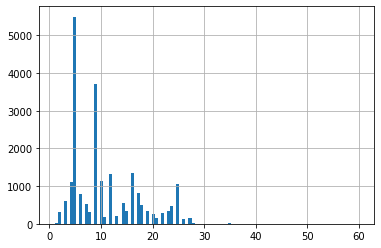

In [32]:
data['floors_total'].hist(bins=100)

можем ограничиться срезом данных до 30-этажных зданий

In [33]:
old_size = data.shape[0]
data = data.query('floors_total <= 30').reset_index(drop=True)
new_size = data.shape[0]
saved_data = (new_size/old_size)*100
print(f'Осталось данных от изначального объёма после фильтрации:{saved_data} %')

Осталось данных от изначального объёма после фильтрации:99.49659984103153 %


как и ожидалось, у значений столбца **floors_total** самая большая корреляция со столбцом **floor** - и у столбца **floor** удачно нету пропущенных значений. лучше всего будет заняться пропусками в значениях **floors_total** именно исходя из этой связи

In [34]:
data['floor'].describe()

count    22532.000000
mean         5.912613
std          4.876710
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

значения в стобце **floor** вполне адекватные и им можно добвериться

In [35]:
mean_floors = data.groupby('floor')['floors_total'].transform('mean')
data['floors_total'].fillna(mean_floors, inplace=True)
data['floors_total'] = data['floors_total'].astype('int')
display(data)

,total_images,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_millions
0,20,108.00,2019-03-07,3,2.700000,16,51.0,8,False,False,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,13.000
1,7,40.40,2018-12-04,1,2.755945,11,18.6,1,False,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,3.350
2,10,56.00,2015-08-20,2,2.755945,5,34.3,4,False,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,5.196
3,2,100.00,2018-06-19,2,3.030000,14,32.0,13,False,False,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,10.000
4,10,30.40,2018-09-10,1,2.755945,12,14.4,5,False,False,...,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,2.890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22527,9,133.81,2017-03-21,3,3.700000,5,73.3,3,False,False,...,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,9.700
22528,14,59.00,2018-01-15,3,2.755945,5,38.0,4,False,False,...,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,3.100
22529,18,56.70,2018-02-11,2,2.755945,3,29.7,1,False,False,...,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500
22530,13,76.75,2017-03-28,2,3.000000,17,NaN,12,False,False,...,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,11.475


проверим есть ли строки, где число этажей меньше, чем сам этаж (чего естественно быть не может в корректных данных)

In [36]:
old_size = data.shape[0]
data = data.query('floors_total >= floor').reset_index(drop=True)
new_size = data.shape[0]
saved_data = (new_size/old_size)*100
print(f'Осталось данных от изначального объёма после фильтрации:{saved_data} %')

Осталось данных от изначального объёма после фильтрации:100.0 %


получается, таких строк даже не было, но проверить это было не лишним

теперь перейдем к столбцу **living_area** - стоит сразу отметить, что ранее было обнаружено наличие в нём пропусков, однако - вполне предсказуема получена высокая конверсия со столбцом **total_area** , пропусков в котором нету - хорошие начальные условия для того, чтобы заполнить пропуски

In [37]:
data['living_area'].describe()

count    20795.000000
mean        32.062958
std         15.019926
min          2.000000
25%         18.500000
50%         30.000000
75%         41.170000
max        128.000000
Name: living_area, dtype: float64

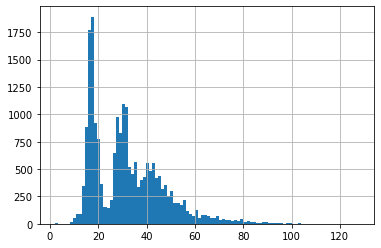

In [38]:
data['living_area'].hist(bins=100)

видно сильно выбивающиеся значения в районе 0 - например вообще сложно представить квартиру с жилой площадью в 2 квадратных метра, точно так же после 100 квадратных метров практически не встречается примеров таких квартир. примем границы хотя бы в минимльные 5 квадратных метров и максимум в 100 квадратных метров

однако перед этим заполним пропуски, опираясь на значения в **total_area**

разобьём значения в **total_area** для точности заполнения пропусков на 20 групп и для каждой из этих групп посчитаем среднюю жилую площадь. а далее для тех строк, где в **living_area** значение будет пропущено - заполним средним значением для соответствующей группы

In [39]:
data['total_area_group'] = pd.qcut(data['total_area'], q=20, precision=0)
display(data)

,total_images,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_millions,total_area_group
0,20,108.00,2019-03-07,3,2.700000,16,51.0,8,False,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,13.000,"(100.0, 150.0]"
1,7,40.40,2018-12-04,1,2.755945,11,18.6,1,False,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,3.350,"(40.0, 42.0]"
2,10,56.00,2015-08-20,2,2.755945,5,34.3,4,False,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,5.196,"(54.0, 57.0]"
3,2,100.00,2018-06-19,2,3.030000,14,32.0,13,False,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,10.000,"(86.0, 100.0]"
4,10,30.40,2018-09-10,1,2.755945,12,14.4,5,False,False,...,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,2.890,"(11.0, 31.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22527,9,133.81,2017-03-21,3,3.700000,5,73.3,3,False,False,...,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,9.700,"(100.0, 150.0]"
22528,14,59.00,2018-01-15,3,2.755945,5,38.0,4,False,False,...,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,3.100,"(57.0, 60.0]"
22529,18,56.70,2018-02-11,2,2.755945,3,29.7,1,False,False,...,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500,"(54.0, 57.0]"
22530,13,76.75,2017-03-28,2,3.000000,17,NaN,12,False,False,...,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,11.475,"(72.0, 78.0]"


In [40]:
mean_area = data.groupby('total_area_group')['living_area'].transform('mean')
data['living_area'].fillna(mean_area, inplace=True)
data.isna().sum() # убедимся, что пропусков больше нет

total_images                0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2088
balcony                 10876
locality_name              46
airports_nearest         5267
cityCenters_nearest      5249
parks_around3000         5248
parks_nearest           15043
ponds_around3000         5248
ponds_nearest           14064
days_exposition          2899
last_price_millions         0
total_area_group            0
dtype: int64

теперь выделим ранее определённые границы:

In [41]:
old_size = data.shape[0]
data = data.query('5 <= living_area <= 100').reset_index(drop=True)
new_size = data.shape[0]
saved_data = (new_size/old_size)*100
print(f'Осталось данных от изначального объёма после фильтрации:{saved_data} %')

Осталось данных от изначального объёма после фильтрации:99.90236108645482 %


посмотрим, есть ли строки, в которых суммарная площадь меньше жилой:

In [42]:
old_size = data.shape[0]
data = data.query('living_area <= total_area').reset_index(drop=True)
new_size = data.shape[0]
saved_data = (new_size/old_size)*100
print(f'Осталось данных от изначального объёма после фильтрации:{saved_data} %')

Осталось данных от изначального объёма после фильтрации:99.97778764993336 %


как видно, примененный метод дал небольшие огрехи - где-то были такие строки, где средняя жилая площадь на основе группировки по общей жилой площади оказалась больше этой самой общей площади. однако таких строк было очень мало 

теперь изучим столбец **kitchen_area** - столбец значений площади кухни в м2

In [43]:
data['kitchen_area'].describe()

count    20423.000000
mean        10.115666
std          4.723538
min          1.300000
25%          7.000000
50%          9.000000
75%         11.500000
max         64.000000
Name: kitchen_area, dtype: float64

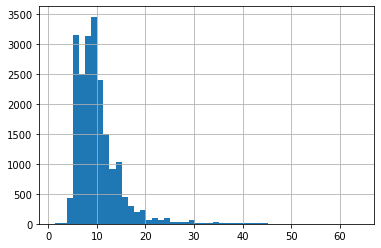

In [44]:
data['kitchen_area'].hist(bins=50)

как видно, редко какая кухня имеет площадь больше 40 м2, точно так же фактически нет кухонь, которые бы были меньше ~ 4 м2. да и из здравой логики значения вне этого диапазона сложно предположить. оставим в дальнейшем только те строки, значения в которых находятся внутри этого интервала

логичнее всего будет попытаться заполнить пропуски так же, как и в случае с жилой площадью - по значению общей площади квартиры. в ранее выведенной таблице **kitchen_area** и **total_area** имеют конверсию порядка 51 %, что достаточно неплохо. хотя конечно стоит отметить, что конверсия со столбцом **last_price_millions** даже 56 %, однако заполнять столбец площади кухни, отталкиваясь от общей площади квартиры, лично мне кажется более правдоподобным и здравым подходом 

In [45]:
mean_area = data.groupby('total_area_group')['kitchen_area'].transform('mean')
data['kitchen_area'].fillna(mean_area, inplace=True)
data.isna().sum() # убедимся, что пропусков больше нет

total_images                0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                 10856
locality_name              46
airports_nearest         5264
cityCenters_nearest      5246
parks_around3000         5245
parks_nearest           15029
ponds_around3000         5245
ponds_nearest           14053
days_exposition          2896
last_price_millions         0
total_area_group            0
dtype: int64

In [46]:
old_size = data.shape[0]
data = data.query('4 <= kitchen_area <= 40').reset_index(drop=True)
new_size = data.shape[0]
saved_data = (new_size/old_size)*100
print(f'Осталось данных от изначального объёма после фильтрации:{saved_data} %')

Осталось данных от изначального объёма после фильтрации:99.64452343923573 %


с точки зрения здравой логики, **total_area** должен быть меньше, чем суммарная площадь **kitchen_area** и **living_area**. посмотрим какое число строк уйдет, если попытаться соблюсти данное условие:

In [47]:
old_size = data.shape[0]
data = data.query('total_area >= kitchen_area + living_area').reset_index(drop=True)
new_size = data.shape[0]
saved_data = (new_size/old_size)*100
print(f'Осталось данных от изначального объёма после фильтрации:{saved_data} %')

Осталось данных от изначального объёма после фильтрации:99.20624303233 %


как видно, результаты вполне здравые - процент строк, где выполнилось соблюдение выше объявленного условия адеватной планировки квартиры в плане соотношения между площадями - фактически везде выполнилось даже после искусственного заполнения пропущенных значений в довольно большом числе строк самостоятельно.

теперь рассмотрим столбец **balcony** - число балконов

In [48]:
data['balcony'].value_counts()

1.0    3975
2.0    3518
0.0    3499
5.0     283
4.0     165
3.0      71
Name: balcony, dtype: int64

его явно стоит перевести в int после заполнения пропусков, которые были найдены ранее. конечно, больше 2-х балконов в моем понимании в принципе многовато, но это по крайней мере не ошибки в несколько порядков в виде 100, 1000 балконов и т.д., и можно предположить, что мы действительно имеем дело с большими жилищами в таких ситуациях. строки с NaN в данном случае - вероятнее всего просто жилища с 0 балконов, где людям было нечего указывать и они оставили это значение пустым. заполним его 0

In [49]:
data['balcony'] = data['balcony'].fillna(0)

In [50]:
data.isna().sum()

total_images                0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              46
airports_nearest         5191
cityCenters_nearest      5173
parks_around3000         5172
parks_nearest           14842
ponds_around3000         5172
ponds_nearest           13892
days_exposition          2858
last_price_millions         0
total_area_group            0
dtype: int64

In [51]:
data['balcony'] = data['balcony'].astype('int')

теперь изучим столбец **locality_name**:

In [52]:
data['locality_name'].value_counts()

Санкт-Петербург                    14657
посёлок Мурино                       495
посёлок Шушары                       435
Всеволожск                           388
Пушкин                               352
                                   ...  
посёлок Платформа 69-й километр        1
деревня Щеглово                        1
поселок городского типа Рябово         1
село Никольское                        1
посёлок Высокоключевой                 1
Name: locality_name, Length: 331, dtype: int64

здесь явно стоит применить категоризацию - по сути мы имеем дело с локализацией недвижимости в Питере, соседних города - Всеволожск, Пушкин... и посёлках/сёлах/садовых товариществах. так же можно предположить, что скорее всего пропущенные значения можно отнести к Питеру из-за его львиной доли от общих данных, тем более пропущенных значений всего 45 строк, чтобы действительно делать по ним глубокий анализ

In [53]:
data['locality_name'] = data['locality_name'].fillna('Санкт-Петербург')

посмотрим какие уникальные значения слов встречаются в данном столбце:

In [54]:
inf = list(data['locality_name'].unique())
unique_words = []
for name in inf:
    words = name.split()
    for word in words:
        if word not in unique_words:
            unique_words.append(word)
sorted(unique_words)

['69-й',
 'Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая',
 'Большие',
 'Большое',
 'Бор',
 'Борисова',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Верево',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Волосово',
 'Волхов',
 'Вруда',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Горка',
 'Гостилицы',
 'Грива',
 'Громово',
 'Девяткино',
 'Дзержинского',
 'Долина',
 'Дружная',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Жилгородок',
 'Жилпосёлок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зелёный',
 'Зимитицы',
 'Ивангород',
 'Ижора',
 'Извара',
 'Ильичёво',
 'Иссад',
 'Калитино',
 'Каложицы',
 'Кальтино',
 'Каменногорск',
 'Камышовка',

на основе полученного списка уникальных слов можем написать следующую функцию для выполнения категоризации и отбрасывания огромного списка из названий, перейдя к более обобщенным понятиям, с которыми будет удобно работать:

In [55]:
def locality_category(data):
    name = data['locality_name']
    if name == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif ('посёлок' in name.split() or
          'поселок' in name.split() or
          'село' in name.split() or
          'товарищество' in name.split() or
          'деревня' in name.split()):
        return 'соседняя деревня'
    else:
        return 'соседний город'

data['locality_name_category'] = data.apply(locality_category, axis=1)

In [56]:
data['locality_name_category'].value_counts()

Санкт-Петербург     14703
соседний город       4059
соседняя деревня     3485
Name: locality_name_category, dtype: int64

перейдём к столбцу **airports_nearest** - расстояние до ближайшего аэропорта в метрах

In [57]:
data['airports_nearest'].describe()

count    17056.000000
mean     28906.910999
std      12804.947972
min          0.000000
25%      18376.750000
50%      26987.000000
75%      37434.000000
max      84869.000000
Name: airports_nearest, dtype: float64

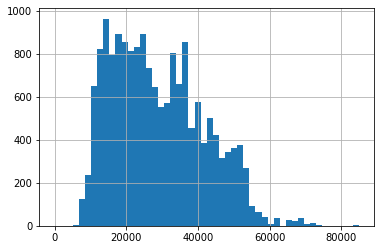

In [58]:
data['airports_nearest'].hist(bins=50)

распределение выглядит как нормальное. видно, что практически отсутствуют значения с расстонием до аэропорта меньше 5000 м (квартира на территории аэропорта с заявленным 0 м в минимальном значении данного столбца уж точно не должна быть) , как и больше 75 000 м фактически не встречается жилплощади, насколько удаленной от аэропорта - эти значения можно будет отбросить. осталось решить как заполнить пропуски

ранее сделанный анализ по корреляции показал, что какой-то явной связи с другими столбцами у данного показателя нету. единственная корреляция, которая присутствует, это корреляция с **cityCenters_nearest** в 0.26, однако в этом столбце тоже достаточно много пропусков. можно попытаться посмотреть совпадают ли пропуски в данных столбцах

In [59]:
data.isna().sum()

total_images                  0
total_area                    0
first_day_exposition          0
rooms                         0
ceiling_height                0
floors_total                  0
living_area                   0
floor                         0
is_apartment                  0
studio                        0
open_plan                     0
kitchen_area                  0
balcony                       0
locality_name                 0
airports_nearest           5191
cityCenters_nearest        5173
parks_around3000           5172
parks_nearest             14842
ponds_around3000           5172
ponds_nearest             13892
days_exposition            2858
last_price_millions           0
total_area_group              0
locality_name_category        0
dtype: int64

In [60]:
data_none = data[data['airports_nearest'].isna() == True]

In [61]:
data_none.isna().sum()

total_images                 0
total_area                   0
first_day_exposition         0
rooms                        0
ceiling_height               0
floors_total                 0
living_area                  0
floor                        0
is_apartment                 0
studio                       0
open_plan                    0
kitchen_area                 0
balcony                      0
locality_name                0
airports_nearest          5191
cityCenters_nearest       5172
parks_around3000          5172
parks_nearest             5176
ponds_around3000          5172
ponds_nearest             5184
days_exposition            798
last_price_millions          0
total_area_group             0
locality_name_category       0
dtype: int64

как видно - пропуски в данных, касающихся расстояния до каких-либо мест, фактически полностью совпадают.так что применить transform и заполнить пропуски данных столбцов в друг друге не получится - однако, если посмотреть уже на корреляцию **cityCenters_nearest** - у него есть целых -0.35 корреляции с столбцом **last_price_millions** , который полностью заполнен. то есть можем предположить, что чем дороже недвижимость, тем меньше её расстояние от центра города - звучит здраво и похожим на реальные данные. предлагаю сначала заполнить данные в столбце **cityCenters_nearest** , а затем отталкиваясь от них остальные столбцы, определяющие расстояния до куда-либо

для начала данный столбец стоит переименовать в соответсвие с нормами правильного оформления, как и некоторые другие:

In [62]:
data = data.rename(
    columns ={'cityCenters_nearest' : 'city_centres_nearest', 
              'parks_around3000' : 'parks_around', 
              'ponds_around3000' : 'ponds_around'})

In [63]:
data.columns

Index(['total_images', 'total_area', 'first_day_exposition', 'rooms',
       'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centres_nearest',
       'parks_around', 'parks_nearest', 'ponds_around', 'ponds_nearest',
       'days_exposition', 'last_price_millions', 'total_area_group',
       'locality_name_category'],
      dtype='object')

теперь взглянем на сами данные в столбце **city_centres_nearest**:

In [64]:
data['city_centres_nearest'].describe()

count    17074.000000
mean     14529.395162
std       8559.667859
min        208.000000
25%       9874.000000
50%      13277.000000
75%      16453.000000
max      65968.000000
Name: city_centres_nearest, dtype: float64

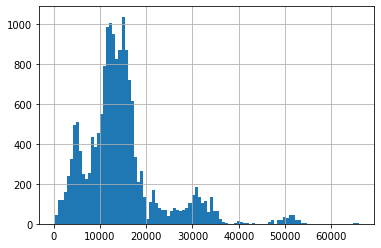

In [65]:
data['city_centres_nearest'].hist(bins=100)

значения выше 55 000 м уже можно назвать слишком большими, глядя на гистограмму. позже их стоит отсечь. но перед этим заполним пропуски - выполним группировку по цене продажи квартиры в новом столбце из 20 категорий и для каждой из этих групп вычислим среднее значение стоимости квартиры, заполнив впоследствие пропуски в столбце **city_centres_nearest**

In [66]:
data['last_price_group'] = pd.qcut(data['last_price_millions'], q=20, precision=0)
mean_centre_distance = data.groupby('last_price_group')['city_centres_nearest'].transform('mean')
data['city_centres_nearest'].fillna(mean_centre_distance, inplace=True)
data.isna().sum() # убедимся, что пропусков больше нет

total_images                  0
total_area                    0
first_day_exposition          0
rooms                         0
ceiling_height                0
floors_total                  0
living_area                   0
floor                         0
is_apartment                  0
studio                        0
open_plan                     0
kitchen_area                  0
balcony                       0
locality_name                 0
airports_nearest           5191
city_centres_nearest          0
parks_around               5172
parks_nearest             14842
ponds_around               5172
ponds_nearest             13892
days_exposition            2858
last_price_millions           0
total_area_group              0
locality_name_category        0
last_price_group              0
dtype: int64

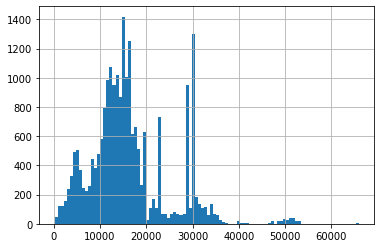

In [67]:
data['city_centres_nearest'].hist(bins=100)

как видно - данные действительно поменялись - заметно возрасло число жилищ с расстоянием до центра в ~ 15 000 м и ~ 28 000 м 

для дальнейшего удоства работы с данными переведём данный столбец из метров в км, а так же отсечём хвост из данных после значений удаленности 55 км от центра

In [68]:
old_size = data.shape[0]
data['city_centres_nearest'] = data['city_centres_nearest']/1000
data = data.query('city_centres_nearest <= 55').reset_index(drop=True)
new_size = data.shape[0]
saved_data = (new_size/old_size)*100
print(f'Осталось данных от изначального объёма после фильтрации:{saved_data} %')

Осталось данных от изначального объёма после фильтрации:99.94606014294062 %


теперь можем заполнить столбец **airports_nearest**

удалим столбцы с группировкой по цене и площади жилищ, добавив сгруппированный столбец для расстояния от центра. по нему же заполним пропуски в столбце с расстоянием до аэропорта

In [69]:
del data['total_area_group']
del data['last_price_group']

In [70]:
data['city_centres_nearest_grouped'] = pd.qcut(data['city_centres_nearest'], q=20, precision=0)
mean_airport_distance = data.groupby('city_centres_nearest_grouped')['airports_nearest'].transform('mean')
data['airports_nearest'].fillna(mean_airport_distance, inplace=True)
data.isna().sum() # убедимся, что пропусков больше нет

total_images                        0
total_area                          0
first_day_exposition                0
rooms                               0
ceiling_height                      0
floors_total                        0
living_area                         0
floor                               0
is_apartment                        0
studio                              0
open_plan                           0
kitchen_area                        0
balcony                             0
locality_name                       0
airports_nearest                    0
city_centres_nearest                0
parks_around                     5172
parks_nearest                   14833
ponds_around                     5172
ponds_nearest                   13882
days_exposition                  2855
last_price_millions                 0
locality_name_category              0
city_centres_nearest_grouped        0
dtype: int64

переведем значения расстояния до центра города в целочисленные для удобства дальнейшего анализа

In [71]:
data['city_centres_nearest'] = data['city_centres_nearest'].astype('int')

переведём значения расстояния до аэропорта так же из метров в км и сделаем срез по ранее объявленому условию

In [72]:
old_size = data.shape[0]
data['airports_nearest'] = data['airports_nearest']/1000
data = data.query('5 < = airports_nearest <= 75').reset_index(drop=True)
new_size = data.shape[0]
saved_data = (new_size/old_size)*100
print(f'Осталось данных от изначального объёма после фильтрации:{saved_data} %')

Осталось данных от изначального объёма после фильтрации:99.99550258601305 %


группировка по удаленности от центра вероятно больше не понадобится

In [73]:
del data['city_centres_nearest_grouped']

изучим столбец **parks_around** - число парков в радиусе 3-х км. в нём так же есть пропуски

In [74]:
data['parks_around'].value_counts()

0.0    9663
1.0    5335
2.0    1547
3.0     517
Name: parks_around, dtype: int64

значения выглядят вполне адекватно. вероятнее всего NaN - просто жилища без парков поблизости - то есть можем заполнить пропуски 0 и заменить данные на тип int

так как анализ будет вероятнее всего с похожим алгоритмом, сразу же рассмотрим столбец **pounds_around**:

In [75]:
data['ponds_around'].value_counts()

0.0    8709
1.0    5384
2.0    1720
3.0    1249
Name: ponds_around, dtype: int64

In [76]:
columns = ['parks_around', 'ponds_around']
for column in columns:
    data[column] = data[column].fillna(0)
    data[column] = data[column].astype('int')

далее идут столбцы **parks_nearest** и **ponds_nearest** - вполне резонно предположить, что пропуски там могут быть в тех же данных, в которых стоят *0* в столбце о кол-ве рядом соответствующих мест. выведем численные значения *0* и пропусков рядом, чтобы это проверить

In [77]:
data.isna().sum()

total_images                  0
total_area                    0
first_day_exposition          0
rooms                         0
ceiling_height                0
floors_total                  0
living_area                   0
floor                         0
is_apartment                  0
studio                        0
open_plan                     0
kitchen_area                  0
balcony                       0
locality_name                 0
airports_nearest              0
city_centres_nearest          0
parks_around                  0
parks_nearest             14832
ponds_around                  0
ponds_nearest             13881
days_exposition            2855
last_price_millions           0
locality_name_category        0
dtype: int64

In [78]:
data['parks_around'].value_counts()

0    14835
1     5335
2     1547
3      517
Name: parks_around, dtype: int64

In [79]:
data['ponds_around'].value_counts()

0    13881
1     5384
2     1720
3     1249
Name: ponds_around, dtype: int64

как видно, теория вполне здравая - единственное, похоже есть 3 строки, где стоит *0* в числе парков поблизовсти **parks_around**, но при этом - указано какое-то расстояние до ближайшего парка в метрах в **parks_nearest**. выведем отельно данные с *0* в числе парков/прудов поблизости 

In [80]:
data_none_parks = data.query('parks_around == 0')
data_none_ponds = data.query('ponds_around == 0')

In [81]:
data_none_ponds['ponds_nearest'].value_counts()

Series([], Name: ponds_nearest, dtype: int64)

для прудов логика действительно совпала - все строки с 0 в числе прудов поблизости - это строки с пропусками о расстоянии до ближайшего парка.

In [82]:
data_none_parks['parks_nearest'].value_counts()

3190.0    2
3064.0    1
Name: parks_nearest, dtype: int64

видимо, конкретно в этих строках данные о числе парков поблизости не указали подумав, что указанные 3 км - это слишком далеко. посмотрим на общую гистограмму по расстоянию до ближайшего парка - может быть эти значения и правда выбиваютс из общей массы и на ней

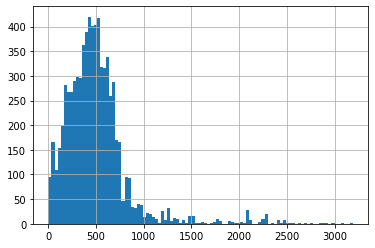

In [83]:
data['parks_nearest'].hist(bins=100)

действительно - эти парки находятся очень далеко от общей массы - поэтому в датафрейме вполне резонно могли применить логику, что число ближайших парков в таком случае = 0

In [84]:
data['parks_nearest'].describe()

count    7402.000000
mean      495.229668
std       342.249282
min         1.000000
25%       292.000000
50%       458.000000
75%       617.000000
max      3190.000000
Name: parks_nearest, dtype: float64

проблему с парками вполне можно решить, отрезав от общей массы строки с расстоянием до ближайшего парка больше 3 000 м - тогда не будет такого несоответствия, что по датафрейму парка рядом нет, а расстояние до него есть. отсутсвующие же значения можно заполнить текстом "нет парка поблизости" - они будут соответсовать строкам в **parks_around** = *0* , сохраняя логику здравого смысла: нет рядом парка - нет и расстояния до ближайшего парка

In [85]:
data['parks_nearest'] = data['parks_nearest'].fillna(0) # заполним пропущенные значения 0 для того, чтобы они прошли фильтрацию
old_size = data.shape[0]
data = data.query('parks_nearest <= 3000').reset_index(drop=True)
data['parks_nearest'] = data['parks_nearest'].where(data['parks_nearest'] != 0, 'нет парка поблизости')
new_size = data.shape[0]
saved_data = (new_size/old_size)*100
print(f'Осталось данных от изначального объёма после фильтрации:{saved_data} %')

Осталось данных от изначального объёма после фильтрации:99.98650715120986 %


In [86]:
data['parks_nearest'].value_counts()

нет парка поблизости    14832
441.0                      55
392.0                      41
173.0                      38
456.0                      34
                        ...  
808.0                       1
803.0                       1
794.0                       1
792.0                       1
1.0                         1
Name: parks_nearest, Length: 983, dtype: int64

In [87]:
data['parks_around'].value_counts()

0    14832
1     5335
2     1547
3      517
Name: parks_around, dtype: int64

как видно - теперь всё соответсвует здравой логике - *0* в числе парков поблизости столбца **parks_around** - это значение *нет парка по близости* из столбца расстояний до ближайшего парка **parks_nearest**

аналогичную логику применим для столбца **ponds_nearest** - пропущенные значения в этом столбце, как показал анализ выше - это значения для жилплощади, у которой просто нету рядом прудов

для начала в любом случае проверим общие данные по этому столбцу:

In [88]:
data['ponds_nearest'].describe()

count    8350.000000
mean      526.548623
std       276.764258
min        13.000000
25%       306.000000
50%       512.000000
75%       736.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

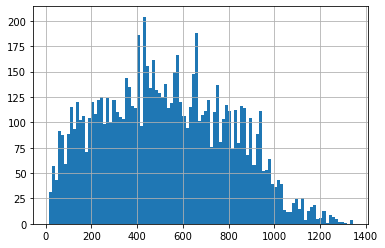

In [89]:
data['ponds_nearest'].hist(bins=100)

выглядит вполне сносно - выбивающихся на порядок или больше значений нету, предлагаю оставить данные в этом столбце как есть, лишь заполнив пропущенные значения ранее выведенной логикой

In [90]:
data['ponds_nearest'] = data['ponds_nearest'].fillna('нет пруда поблизости')

In [91]:
data['ponds_nearest'].value_counts()

нет пруда поблизости    13881
427.0                      58
433.0                      39
454.0                      36
564.0                      34
                        ...  
1126.0                      1
884.0                       1
889.0                       1
895.0                       1
93.0                        1
Name: ponds_nearest, Length: 1088, dtype: int64

In [92]:
data['ponds_around'].value_counts()

0    13881
1     5381
2     1720
3     1249
Name: ponds_around, dtype: int64

примененная логика выглядит успешно - теперь если в округе 0 прудов - значит в качестве расстояния до него ожидаемо увидим *нет пруда поблизости*

осталась только колонка **days_exposition** - число дней размещения от публикации до снятия

In [93]:
data['days_exposition'].describe()

count    19376.000000
mean       177.723472
std        216.186684
min          1.000000
25%         44.000000
50%         94.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64

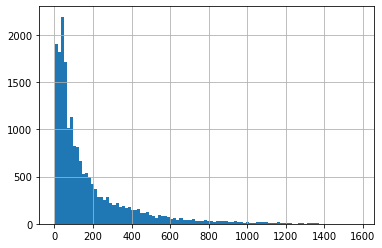

In [94]:
data['days_exposition'].hist(bins=100)

в целом - с данными можно работать в том виде, в котором они есть. видим, что большинство жилищ продаются в ближайшие 600 дней - то есть ~ за полтора года от публикации, но есть и квартиры, которые висели по несколько лет. попытаемся определить, как заполнить пропуски в данном столбце. выведем таблицу конверсии величин для поиска закономерности

In [95]:
data.corr()

,total_images,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centres_nearest,parks_around,ponds_around,days_exposition,last_price_millions
total_images,1.000000,0.116941,0.090899,0.008086,0.013591,0.101584,0.034545,0.012008,-0.025991,-0.022186,0.087942,0.047499,0.006321,-0.076396,0.023536,-0.002097,-0.033686,0.160710
total_area,0.116941,1.000000,0.792545,0.331099,-0.034280,0.925871,-0.027284,0.014850,-0.085917,-0.052047,0.542555,0.048230,-0.008839,-0.279737,0.146045,0.167616,0.143975,0.758143
rooms,0.090899,0.792545,1.000000,0.137192,-0.224832,0.876261,-0.165711,-0.008505,-0.142328,-0.085303,0.165561,0.001616,-0.045077,-0.172380,0.099890,0.076030,0.100499,0.460727
ceiling_height,0.008086,0.331099,0.137192,1.000000,-0.028752,0.272156,-0.016003,0.047694,0.008458,0.009041,0.309052,-0.075862,-0.065933,-0.284335,0.204346,0.194857,0.074142,0.391065
floors_total,0.013591,-0.034280,-0.224832,-0.028752,1.000000,-0.162344,0.673402,-0.018968,0.065558,0.042052,0.246352,0.170305,0.132435,-0.125998,-0.153468,-0.055519,-0.046533,0.109854
living_area,0.101584,0.925871,0.876261,0.272156,-0.162344,1.000000,-0.117551,0.009232,-0.062960,-0.037049,0.291412,0.014655,-0.040375,-0.241358,0.150990,0.138603,0.128125,0.642211
floor,0.034545,-0.027284,-0.165711,-0.016003,0.673402,-0.117551,1.000000,-0.008452,0.034804,0.031209,0.169350,0.167912,0.089870,-0.080566,-0.102794,-0.036279,-0.038116,0.088601
is_apartment,0.012008,0.014850,-0.008505,0.047694,-0.018968,0.009232,-0.008452,1.000000,-0.002709,-0.001821,0.026175,0.035616,0.018350,0.010034,0.002756,0.013107,0.002440,0.019600
studio,-0.025991,-0.085917,-0.142328,0.008458,0.065558,-0.062960,0.034804,-0.002709,1.000000,-0.003220,-0.053898,0.030384,-0.017142,0.019898,-0.030236,-0.009068,-0.012503,-0.047520
open_plan,-0.022186,-0.052047,-0.085303,0.009041,0.042052,-0.037049,0.031209,-0.001821,-0.003220,1.000000,-0.031817,0.028599,-0.008335,0.021375,-0.018102,-0.012566,-0.020121,-0.033629


какой-то явной корреляции тут нельзя обнаружить - однако глядя на общую гистограмму - есть очень много квартир, которые были проданы фактически за считанные дни (большое скопление значений непосредственно около нуля, при этом минимальное вещественное число в таблице - 1 (то есть продажа на следующий же день) - может быть стоит полгать, что раз нулей в таблице нету, то как раз они представляют собой значения NaN ? 

44.00000000000001 - первый квартиль в данных о длительности продажи квартиры


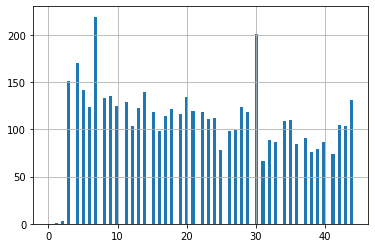

In [96]:
Q1 = data['days_exposition'].quantile(0.25)
data['days_exposition'].hist(bins=100, range=(0,Q1))
print(Q1, '- первый квартиль в данных о длительности продажи квартиры')

In [97]:
data['days_exposition'].describe() # проверил, что это действительно был первый квартиль

count    19376.000000
mean       177.723472
std        216.186684
min          1.000000
25%         44.000000
50%         94.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [98]:
data.isna().sum()

total_images                 0
total_area                   0
first_day_exposition         0
rooms                        0
ceiling_height               0
floors_total                 0
living_area                  0
floor                        0
is_apartment                 0
studio                       0
open_plan                    0
kitchen_area                 0
balcony                      0
locality_name                0
airports_nearest             0
city_centres_nearest         0
parks_around                 0
parks_nearest                0
ponds_around                 0
ponds_nearest                0
days_exposition           2855
last_price_millions          0
locality_name_category       0
dtype: int64

по укрупненной гистограмме можно сказать, что в ближайшие же дни после размещения (до 10 дней) - продавались в среднем 100-150 жилищ, но не почти 3 000 за один день, которые будут внесены в датафрейм, если мы присвоим значение 0 всем пропускам - такой новообразовавшийся столбец в гистограмме будет явно выбиваться и будет непохож на правду. видимо, чтобы не терять данные, но и чтобы заполненные пропуски не вносили сильного резонанса в общий датафрейм - оптимальнее всего будет выполнить заполнение пропущенных данных средним значением

In [99]:
mean_days = data['days_exposition'].mean()
data['days_exposition'] = data['days_exposition'].fillna(mean_days)

In [100]:
data['days_exposition'] = data['days_exposition'].astype('int') # переведем дни в соответствующий тип данных

выведем на экран финальный датафрейм для дальнейшего анализа

In [101]:
display(data)

,total_images,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,locality_name,airports_nearest,city_centres_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,last_price_millions,locality_name_category
0,20,108.00,2019-03-07,3,2.700000,16,51.000000,8,False,False,...,Санкт-Петербург,18.863000,16,1,482,2,755,177,13.000,Санкт-Петербург
1,7,40.40,2018-12-04,1,2.755945,11,18.600000,1,False,False,...,посёлок Шушары,12.817000,18,0,нет парка поблизости,0,нет пруда поблизости,81,3.350,соседняя деревня
2,10,56.00,2015-08-20,2,2.755945,5,34.300000,4,False,False,...,Санкт-Петербург,21.741000,13,1,90,2,574,558,5.196,Санкт-Петербург
3,10,30.40,2018-09-10,1,2.755945,12,14.400000,5,False,False,...,городской посёлок Янино-1,33.781127,22,0,нет парка поблизости,0,нет пруда поблизости,55,2.890,соседняя деревня
4,6,37.30,2017-11-02,1,2.755945,26,10.600000,6,False,False,...,посёлок Парголово,52.996000,19,0,нет парка поблизости,0,нет пруда поблизости,155,3.700,соседняя деревня
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22226,9,133.81,2017-03-21,3,3.700000,5,73.300000,3,False,False,...,Санкт-Петербург,24.665000,4,1,796,3,381,177,9.700,Санкт-Петербург
22227,14,59.00,2018-01-15,3,2.755945,5,38.000000,4,False,False,...,Тосно,36.485196,19,0,нет парка поблизости,0,нет пруда поблизости,45,3.100,соседний город
22228,18,56.70,2018-02-11,2,2.755945,3,29.700000,1,False,False,...,село Рождествено,24.612857,28,0,нет парка поблизости,0,нет пруда поблизости,177,2.500,соседняя деревня
22229,13,76.75,2017-03-28,2,3.000000,17,44.846031,12,False,False,...,Санкт-Петербург,39.140000,10,2,173,3,196,602,11.475,Санкт-Петербург


## Предобработка данных

думаю, предобработку я уже по сути совместил сразу с анализом каждого из столбцов

## Расчёты и добавление результатов в таблицу

посчитаем и добавим в таблицу **цену квадртаного метра** (если предполагать, что изначальная цена продажи была дана в рублях, то получим цену квадратного метра в млн. рублей).

In [102]:
data['square_meter_price'] = data['last_price_millions']/data['total_area']

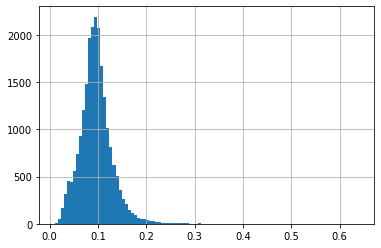

In [103]:
data['square_meter_price'].hist(bins=100)

для удобства просмотра думаю стоит перевести цену в 1000 рублей за квадратный метр

In [104]:
data['square_meter_price'] = (data['last_price_millions']/data['total_area'])*1000

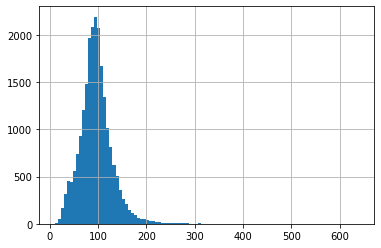

In [105]:
data['square_meter_price'].hist(bins=100)

In [106]:
data['square_meter_price'].describe()

count    22231.000000
mean        96.115595
std         33.368257
min         10.507246
25%         76.585470
50%         94.444444
75%        112.745098
max        640.422350
Name: square_meter_price, dtype: float64

полученный анализ получился таковым, что максимальная цена за квадратный метр - 600 тысяч рублей, а минимальная - примерно 10 тысяч. чаще всего можно встретить цену за квадартный метр примерно в 100 тысяч рублей

в таблицу необходимо добавить **день недели**, **месяц** и **год** публикации объявления

In [107]:
data['week_day_exposition'] = data['first_day_exposition'].dt.weekday

In [108]:
data['month_exposition'] = data['first_day_exposition'].dt.month

In [109]:
data['year_exposition'] = data['first_day_exposition'].dt.year

In [110]:
display(data)

,total_images,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around,ponds_nearest,days_exposition,last_price_millions,locality_name_category,square_meter_price,week_day_exposition,month_exposition,year_exposition
0,20,108.00,2019-03-07,3,2.700000,16,51.000000,8,False,False,...,482,2,755,177,13.000,Санкт-Петербург,120.370370,3,3,2019
1,7,40.40,2018-12-04,1,2.755945,11,18.600000,1,False,False,...,нет парка поблизости,0,нет пруда поблизости,81,3.350,соседняя деревня,82.920792,1,12,2018
2,10,56.00,2015-08-20,2,2.755945,5,34.300000,4,False,False,...,90,2,574,558,5.196,Санкт-Петербург,92.785714,3,8,2015
3,10,30.40,2018-09-10,1,2.755945,12,14.400000,5,False,False,...,нет парка поблизости,0,нет пруда поблизости,55,2.890,соседняя деревня,95.065789,0,9,2018
4,6,37.30,2017-11-02,1,2.755945,26,10.600000,6,False,False,...,нет парка поблизости,0,нет пруда поблизости,155,3.700,соседняя деревня,99.195710,3,11,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22226,9,133.81,2017-03-21,3,3.700000,5,73.300000,3,False,False,...,796,3,381,177,9.700,Санкт-Петербург,72.490845,1,3,2017
22227,14,59.00,2018-01-15,3,2.755945,5,38.000000,4,False,False,...,нет парка поблизости,0,нет пруда поблизости,45,3.100,соседний город,52.542373,0,1,2018
22228,18,56.70,2018-02-11,2,2.755945,3,29.700000,1,False,False,...,нет парка поблизости,0,нет пруда поблизости,177,2.500,соседняя деревня,44.091711,6,2,2018
22229,13,76.75,2017-03-28,2,3.000000,17,44.846031,12,False,False,...,173,3,196,602,11.475,Санкт-Петербург,149.511401,1,3,2017


как видно, месяц и день записались просто как число в таблицу, а не как название соответсвующего дня недели или месяца года. можно написать функцию, которая вернёт соответствующие значения

In [111]:
def week_day(data):
    day = data['week_day_exposition']
    if day == 0:
        return 'понедельник'
    elif day == 1:
        return 'вторник'
    elif day == 2:
        return 'среда'
    elif day == 3:
        return 'четверг'
    elif day == 4:
        return 'пятница'
    elif day == 5:
        return 'суббота'
    elif day == 6:
        return 'воскресенье'

data['week_day_exposition'] = data.apply(week_day, axis=1)

In [112]:
def month(data):
    month = data['month_exposition']
    if month == 1:
        return 'январь'
    elif month == 2:
        return 'февраль'
    elif month == 3:
        return 'март'
    elif month == 4:
        return 'апрель'
    elif month == 5:
        return 'май'
    elif month == 6:
        return 'июнь'
    elif month == 7:
        return 'июль'
    elif month == 8:
        return 'август'
    elif month == 9:
        return 'сентябрь'
    elif month == 10:
        return 'октябрь'
    elif month == 11:
        return 'ноябрь'
    elif month == 12:
        return 'декабрь'

data['month_exposition'] = data.apply(month, axis=1)

In [113]:
display(data)

,total_images,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around,ponds_nearest,days_exposition,last_price_millions,locality_name_category,square_meter_price,week_day_exposition,month_exposition,year_exposition
0,20,108.00,2019-03-07,3,2.700000,16,51.000000,8,False,False,...,482,2,755,177,13.000,Санкт-Петербург,120.370370,четверг,март,2019
1,7,40.40,2018-12-04,1,2.755945,11,18.600000,1,False,False,...,нет парка поблизости,0,нет пруда поблизости,81,3.350,соседняя деревня,82.920792,вторник,декабрь,2018
2,10,56.00,2015-08-20,2,2.755945,5,34.300000,4,False,False,...,90,2,574,558,5.196,Санкт-Петербург,92.785714,четверг,август,2015
3,10,30.40,2018-09-10,1,2.755945,12,14.400000,5,False,False,...,нет парка поблизости,0,нет пруда поблизости,55,2.890,соседняя деревня,95.065789,понедельник,сентябрь,2018
4,6,37.30,2017-11-02,1,2.755945,26,10.600000,6,False,False,...,нет парка поблизости,0,нет пруда поблизости,155,3.700,соседняя деревня,99.195710,четверг,ноябрь,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22226,9,133.81,2017-03-21,3,3.700000,5,73.300000,3,False,False,...,796,3,381,177,9.700,Санкт-Петербург,72.490845,вторник,март,2017
22227,14,59.00,2018-01-15,3,2.755945,5,38.000000,4,False,False,...,нет парка поблизости,0,нет пруда поблизости,45,3.100,соседний город,52.542373,понедельник,январь,2018
22228,18,56.70,2018-02-11,2,2.755945,3,29.700000,1,False,False,...,нет парка поблизости,0,нет пруда поблизости,177,2.500,соседняя деревня,44.091711,воскресенье,февраль,2018
22229,13,76.75,2017-03-28,2,3.000000,17,44.846031,12,False,False,...,173,3,196,602,11.475,Санкт-Петербург,149.511401,вторник,март,2017


In [114]:
data['week_day_exposition'].value_counts()

четверг        4003
вторник        3930
пятница        3782
среда          3719
понедельник    3396
суббота        1806
воскресенье    1595
Name: week_day_exposition, dtype: int64

In [115]:
data['month_exposition'].value_counts()

февраль     2469
март        2432
апрель      2246
ноябрь      2236
октябрь     1999
сентябрь    1862
июнь        1648
август      1638
июль        1572
декабрь     1541
январь      1407
май         1181
Name: month_exposition, dtype: int64

как видно, функции сработали успешно и теперь столбцы наглядно отражают месяц и день недели размещения объявления

добавим столбец с категоризацией этажа квартиры в доме - **первый** , **последний**, **другой**

In [116]:
def floor_category(data):
    floor = data['floor']
    height = data['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == height:
        return 'последний'
    else:
        return 'другой'

data['floor_category'] = data.apply(floor_category, axis=1)

In [117]:
data['floor_category'].value_counts()

другой       16456
последний     3036
первый        2739
Name: floor_category, dtype: int64

как видно, функция отработала успешно

добавим в таблицу **отношение жилой площади к общей** , а так же **отношение площади кухни к общей**

In [118]:
data['living_area_ratio'] = (data['living_area']/data['total_area'])*100
data['kitchen_area_ratio'] = (data['kitchen_area']/data['total_area'])*100

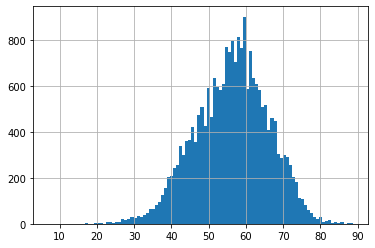

In [119]:
data['living_area_ratio'].hist(bins=100)

In [120]:
data['living_area_ratio'].describe()

count    22231.000000
mean        56.227026
std          9.797746
min          6.958763
25%         49.915720
50%         56.731518
75%         62.904975
max         88.636364
Name: living_area_ratio, dtype: float64

как видно, жилплощадь занимает от ~ 7% до ~ 88% от общей площади квартиры. однако в подавляющем большинстве этот показатель от 50 до 70 % 

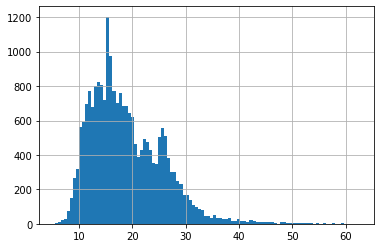

In [121]:
data['kitchen_area_ratio'].hist(bins=100)

In [122]:
data['kitchen_area_ratio'].describe()

count    22231.000000
mean        18.885359
std          6.800822
min          5.434783
25%         13.841656
50%         17.534905
75%         23.255225
max         62.500000
Name: kitchen_area_ratio, dtype: float64

ожидаемо у площади кухни этот показатель меньше, как правило кухня составляет примерно 15% площади квартиры, но есть и редкие случаи, когда этот показатель доходит даже до 60%

## Исследовательский анализ данных

Изучите, зависит ли **цена** от **квадратного метра**, **числа комнат**, **этажа (первого или последнего)**, **удалённости от центра**. Также изучите зависимость от **даты размещения**: дня недели, месяца и года.

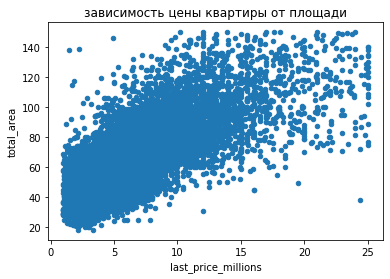

In [123]:
import matplotlib.pyplot as plt
data.plot(x='last_price_millions', y='total_area', kind='scatter')
plt.title('зависимость цены квартиры от площади')
plt.show()

как видно - зависимость наблюдается. в среднем, чем выше площадь, тем выше и цена при продаже

In [124]:
data['last_price_millions'].corr(data['total_area'])

0.7581431782025098

это подтверждает не только график, но и вычисление корреляции между этими столбцами

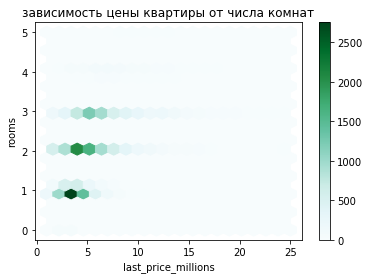

In [125]:
data.plot(x='last_price_millions', y='rooms', kind='hexbin', gridsize=20, sharex=False)
plt.title('зависимость цены квартиры от числа комнат')
plt.show()

In [126]:
data['last_price_millions'].corr(data['rooms'])

0.4607270445920068

In [127]:
data.groupby('rooms')['last_price_millions'].mean()

rooms
0     3.078575
1     3.851689
2     5.424248
3     7.111837
4     9.005861
5    10.241836
Name: last_price_millions, dtype: float64

как видно, тут так же есть прямая корреляция как на графиках, так и по показателям при группировке. на графиках густота "двигается" правее при увеличении числа комнат в квартире, а группировка при помощи *groupby* даёт совсем наглядный результат. это в целом и так можно было предположить из вычисленной предыдущей корреляции - ведь чем больше общая площадь **total_area**, тем скорее всего больше комнат. так что корреляция этих столбцов с столбцом стоимости квартиры перед продажей обязана была случиться

In [128]:
data.pivot_table(index='floor_category', values='last_price_millions')

,last_price_millions
floor_category,
другой,5.691376
первый,4.494418
последний,5.160843


какого-то сильного разброса значений тут нельзя выделить, однако стоит сказать, что квартиры на первом этаже по статистике самые дешевые, далее по цене идут квартиры на последнем этаже, и самые дорогие квартиры - это квартиры "посередине". видимо люди в целом скептически относятся к квартирам, которые непосредственно соседствуют с подвалом или чердаком/крышей

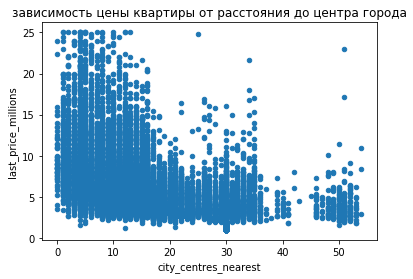

In [129]:
data.plot(x='city_centres_nearest', y='last_price_millions', kind='scatter')
plt.title('зависимость цены квартиры от расстояния до центра города')
plt.show()

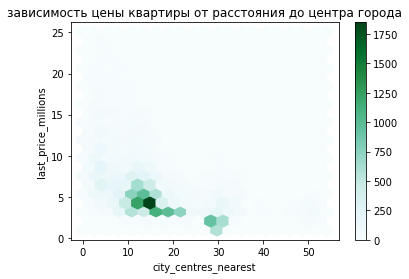

In [130]:
data.plot(x='city_centres_nearest', y='last_price_millions', kind='hexbin', gridsize=20, sharex=False)
plt.title('зависимость цены квартиры от расстояния до центра города')
plt.show()

In [131]:
data['last_price_millions'].corr(data['city_centres_nearest'])

-0.4851208058449079

как видно и по графикам, и по вручную вычисленной корреляции - чем квартира дальше от центра, тем меньше её цена. резкйи рост начинается примерно на 17 км от центра - вероятнее всего примерно от этой области в большинстве рассматриваемых населенных пунктов начинается центр, где подскакивают цены на жильё

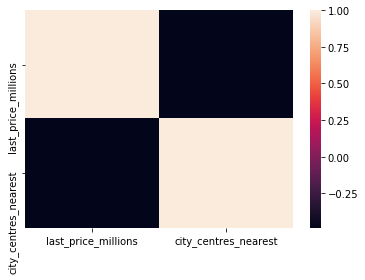

In [132]:
import seaborn
seaborn.heatmap(data[['last_price_millions', 'city_centres_nearest']].corr())

In [133]:
date_categories = ['week_day_exposition', 'month_exposition', 'year_exposition']
for category in date_categories:
    print(data.pivot_table(index=category, values='last_price_millions'))

                     last_price_millions
week_day_exposition                     
воскресенье                     5.331187
вторник                         5.501468
понедельник                     5.475067
пятница                         5.451200
среда                           5.536186
суббота                         5.327967
четверг                         5.518522
                  last_price_millions
month_exposition                     
август                       5.423093
апрель                       5.556793
декабрь                      5.509545
июль                         5.417935
июнь                         5.289595
май                          5.417709
март                         5.455895
ноябрь                       5.538516
октябрь                      5.381418
сентябрь                     5.631602
февраль                      5.449414
январь                       5.542639
                 last_price_millions
year_exposition                     
2014                     

как видно из получившихся сводных таблиц - день и месяц размещения довольно слабо влияют на то, какой будет цена проданной квартиры. однако что насчёт лет - средняя цена относительно 2014 года упала практически в полтора раза, то есть квартиры в среднем подешевели, хотя с 2016 года по 2019 снова почти перестали меняться в цене.
**я хотел сделать это не при помощи pivot_table, а при помощи гистограммы - чтобы по оси x были дни/года/месяцы, а по оси y отложены значения средней стоимости, однако прям жестко запутался в том, как это реализовать. был бы благодарен за демонстрацию примера**

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья

для начала покажем 10 мест с самой дорогой средней стоимостью квартир и 10 мест с самыми дешевыми квартирами, раз это требуется в исследовании:

In [134]:
locality_prices = data.pivot_table(
    index='locality_name', values='last_price_millions').sort_values(by='last_price_millions', ascending=False)
display(locality_prices)

,last_price_millions
locality_name,
Зеленогорск,6.941950
Санкт-Петербург,6.462216
Сестрорецк,6.240251
Пушкин,5.807628
посёлок Лисий Нос,5.027500
...,...
поселок Каложицы,1.090000
городской посёлок Лесогорский,1.075000
поселок Житково,1.050000


In [135]:
richest_ten = locality_prices.head(10).index

In [136]:
richest_ten # 10 мест с самыми дорогими квартирами

Index(['Зеленогорск', 'Санкт-Петербург', 'Сестрорецк', 'Пушкин',
       'посёлок Лисий Нос', 'посёлок Репино', 'деревня Заневка',
       'деревня Мистолово', 'деревня Глинка', 'коттеджный поселок Счастье'],
      dtype='object', name='locality_name')

In [137]:
cheapest_ten = locality_prices.tail(10).index

In [138]:
cheapest_ten # 10 мест с самыми дешевыми квартирами

Index(['посёлок Пансионат Зелёный Бор', 'посёлок городского типа Важины',
       'деревня Пчева', 'деревня Борисова Грива', 'деревня Котлы',
       'поселок Каложицы', 'городской посёлок Лесогорский', 'поселок Житково',
       'деревня Раздолье', 'посёлок Алексеевка'],
      dtype='object', name='locality_name')

теперь выберем 10 мест с самым большим числом объявлений

In [139]:
popular_places = data['locality_name'].value_counts().head(10).index
popular_places

Index(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object')

In [140]:
data_popular_places = data.query('locality_name in @popular_places')

датафрейм, состоящий только из мест с наибольшим числом объявлений готов. теперь можем посчитать среднюю стоимость за квадратный метр для каждого из них:

In [141]:
data_popular_places.pivot_table(index='locality_name', values='square_meter_price')

,square_meter_price
locality_name,
Всеволожск,68.638240
Выборг,58.439033
Гатчина,68.881109
Колпино,75.389159
Пушкин,102.194061
Санкт-Петербург,109.527175
деревня Кудрово,92.484147
посёлок Мурино,85.130171
посёлок Парголово,90.291781


далбнейшие исследования проводятся исколючительно для Санкт-Питербурга, поэтому сразу создадим для него отдельный датафрейм

In [142]:
data_peter = data.query('locality_name == "Санкт-Петербург"')

Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. 

округлённых до целых значений столбец **city_centres_nearest** уже есть - осталось сделать для него совместный график с **last_price_millions**

для начала попробуем решить задачу без графиков, а просто по сухим числам из таблиц

In [143]:
data_peter['city_centres_nearest'].value_counts().count()

32

In [144]:
data_peter.pivot_table(
    index='city_centres_nearest', values='last_price_millions').sort_values(by='city_centres_nearest').head(32)

,last_price_millions
city_centres_nearest,
0,10.079500
1,10.420346
2,9.638066
3,8.944942
4,9.887119
5,9.007453
6,8.559861
7,8.245868
8,7.569830


возможно проследить резкий рост таким способом - не самая лучшая идея. попробуем изобразить всё это графически

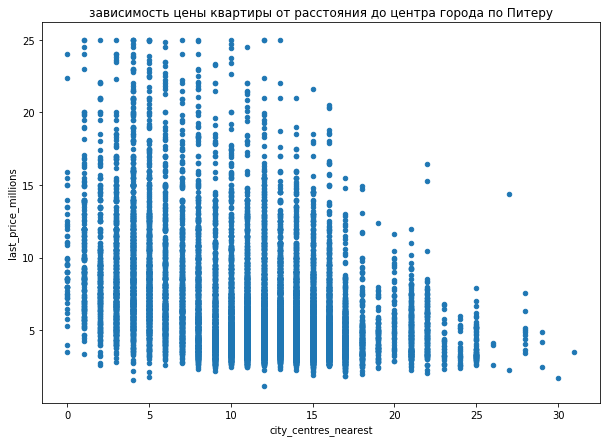

In [145]:
data_peter.plot(x='city_centres_nearest', y='last_price_millions', kind='scatter', figsize=(10,7))
plt.title('зависимость цены квартиры от расстояния до центра города по Питеру')
plt.show()

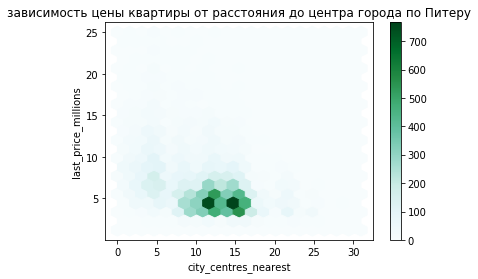

In [146]:
data_peter.plot(x='city_centres_nearest', y='last_price_millions', kind='hexbin', gridsize=20, sharex=False)
plt.title('зависимость цены квартиры от расстояния до центра города по Питеру')
plt.show()

при графическом же рассмотрении уже можно сделать определенные выводы - на отметке в 15 км от центра наблюдается резкий всплеск кол-ва проданных квартир (сгущения на графике *hexbin*) - хоть проданы они и по вполне обычной цене, но при этом в любом случае наблюдается появление действиетльно дорогих квартир (от 15 млн, которых на большем удалении от центра уже почти не встретить), (на графике *scatter* заметно, как после 15-го км по мере приближения к центру цена начинает подскакивать) - думаю, радиус в 15 км вполне можно по этим данным считать центром Питера

In [147]:
data_center = data_peter.query('city_centres_nearest <= 15')

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

проанализируем как распределена площадь **total_area** в центре и по городу в целом:

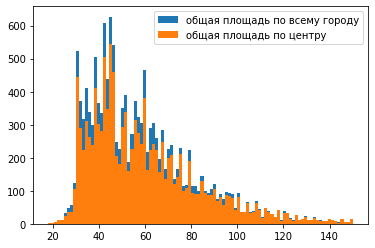

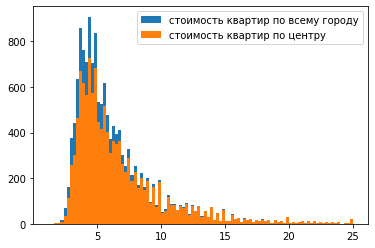

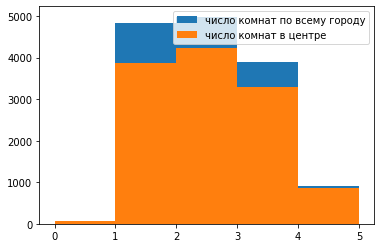

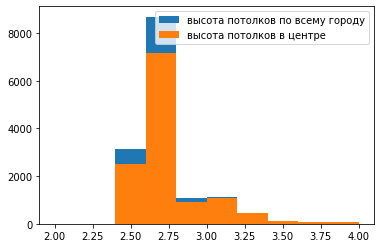

In [148]:
from matplotlib import pyplot

research_columns = ['total_area', 'last_price_millions', 'rooms', 'ceiling_height']

for column in research_columns:
    if column == 'total_area':
        pyplot.hist(data_peter['total_area'], bins=100, label='общая площадь по всему городу')
        pyplot.hist(data_center['total_area'], bins=100, label='общая площадь по центру')
        pyplot.legend(loc='upper right')
        pyplot.show()
    elif column == 'last_price_millions':
        pyplot.hist(data_peter['last_price_millions'], bins=100, label='стоимость квартир по всему городу')
        pyplot.hist(data_center['last_price_millions'], bins=100, label='стоимость квартир по центру')
        pyplot.legend(loc='upper right')
        pyplot.show()
    elif column == 'rooms':
        pyplot.hist(data_peter['rooms'], bins=5, label='число комнат по всему городу')
        pyplot.hist(data_center['rooms'], bins=5, label='число комнат в центре')
        pyplot.legend(loc='upper right')
        pyplot.show()
    else:
        pyplot.hist(data_peter['ceiling_height'], bins=10, label='высота потолков по всему городу')
        pyplot.hist(data_center['ceiling_height'], bins=10, label='высота потолков в центре')
        pyplot.legend(loc='upper right')
        pyplot.show()

как видно по гистограммам - общий вид распределения значений исследованных столбцов не сильно отличается для центра и города в целом - чаще/реже всего встречаются примерно одни и те же данные

проанализируем средние значения в данных столбцах

In [149]:
for column in research_columns:
    if column == 'total_area':
        print(f'Средняя площадь квартиры в центре:{data_center["total_area"].mean()}')
        print(f'Средняя площадь квартиры в городе:{data_peter["total_area"].mean()}')
    elif column == 'last_price_millions':
        print(f'Средняя стоимость квартиры в центре:{data_center["last_price_millions"].mean()}')
        print(f'Средняя стоимость квартиры в городе:{data_peter["last_price_millions"].mean()}')
    elif column == 'rooms':
        print(f'Среднее число комнат в центре:{data_center["rooms"].mean()}')
        print(f'Среднее число комнат в городе:{data_peter["rooms"].mean()}')
    else:
        print(f'Средняя высота потолков в центре:{data_center["ceiling_height"].mean()}')
        print(f'Средняя высота потолков в городе:{data_peter["ceiling_height"].mean()}')

Средняя площадь квартиры в центре:59.53530285807081
Средняя площадь квартиры в городе:58.540281651813046
Средняя стоимость квартиры в центре:6.72834623684638
Средняя стоимость квартиры в городе:6.462215978297844
Среднее число комнат в центре:2.092806105878532
Среднее число комнат в городе:2.0601401455881354
Средняя высота потолков в центре:2.7530606915432823
Средняя высота потолков в городе:2.7419655233359244


можно сказать, что показатели не очень сильно отличаются. конечно, в центре Питера больше более дорогих квартир, чем на окраинах, как было показано выше, но общее кол-во квартир все равно стоит примерно одинаково - нагляднее всего это показывал график *hexbin* , по которому мы определяли где начинается "центр" Питера - самые жирные ячейки там были в любом случае на отметке квартир стоимостью в 5-6 млн и даже ближе к центру не встречалось какой-то активной продажи реально дорогих квартир, а лишь их точечное наличие на графике *scatter*, чем объяется примерное равенство и остальных показателей (как было выявлено ранее, средняя площадь квартиры и число комнат коррелируют со стоимостью квартиры)

спрашивалось так же меняется как-либо корреляция стоимости квартиры с остальными параметрами для центра Питера и для города в целом - выведем общую таблицу корреляции для центра и для Питера, и сравним, есть ли там какие-то различия. предварительно оставим в них лишь столбцы, о которых спрашивается в исследовании: число комнат, этаж, удалённость от центра, дата размещения объявления: 

In [150]:
data_center = data_center[['last_price_millions', 'rooms', 'floor', 'city_centres_nearest', 'week_day_exposition', 'month_exposition', 'year_exposition']]
data_center.corr()

,last_price_millions,rooms,floor,city_centres_nearest,year_exposition
last_price_millions,1.000000,0.493848,0.042072,-0.401248,-0.018883
rooms,0.493848,1.000000,-0.176592,-0.242238,-0.052038
floor,0.042072,-0.176592,1.000000,0.256105,0.017457
city_centres_nearest,-0.401248,-0.242238,0.256105,1.000000,0.092997
year_exposition,-0.018883,-0.052038,0.017457,0.092997,1.000000


In [151]:
data_peter = data_peter[['last_price_millions', 'rooms', 'floor', 'city_centres_nearest', 'week_day_exposition', 'month_exposition', 'year_exposition']]
data_peter.corr()

,last_price_millions,rooms,floor,city_centres_nearest,year_exposition
last_price_millions,1.000000,0.499449,0.032754,-0.402196,-0.012391
rooms,0.499449,1.000000,-0.173617,-0.221450,-0.046542
floor,0.032754,-0.173617,1.000000,0.218647,0.011318
city_centres_nearest,-0.402196,-0.221450,0.218647,1.000000,0.076051
year_exposition,-0.012391,-0.046542,0.011318,0.076051,1.000000


каких-то явных расхождений тут не заметить. посмотрим напоследок какие могут быть различия если говорить о днях недели или месяце размещения

In [152]:
data_peter.pivot_table(index='week_day_exposition', values='last_price_millions')

,last_price_millions
week_day_exposition,
воскресенье,6.364962
вторник,6.443562
понедельник,6.481958
пятница,6.419990
среда,6.482050
суббота,6.329777
четверг,6.583078


In [153]:
data_center.pivot_table(index='week_day_exposition', values='last_price_millions')

,last_price_millions
week_day_exposition,
воскресенье,6.549312
вторник,6.681422
понедельник,6.768075
пятница,6.667503
среда,6.803396
суббота,6.569869
четверг,6.869418


In [154]:
data_peter.pivot_table(index='month_exposition', values='last_price_millions')

,last_price_millions
month_exposition,
август,6.333852
апрель,6.495608
декабрь,6.642928
июль,6.342451
июнь,6.292554
май,6.360478
март,6.497871
ноябрь,6.499951
октябрь,6.289225


In [155]:
data_center.pivot_table(index='month_exposition', values='last_price_millions')

,last_price_millions
month_exposition,
август,6.590225
апрель,6.748627
декабрь,6.860404
июль,6.634940
июнь,6.543569
май,6.588251
март,6.786706
ноябрь,6.763193
октябрь,6.575705


думаю, теперь уже точно можно сказать, что явных отличий между центром города и средними показателями по Питеру нет

## Общий вывод

на стоимость квартиры в основном вляют её площадь, соответственно и число комнат, а так же немаловажно, что своё влияние вносит удаленность от центра - вполне логичное предположение, что чем ближе квартира к центру, тем она дороже стоит - действительно подстверждается в исследуемых данных. так же стоит отметить, что на стоимость квартиры может влиять и этаж расположения - на первом и последнем этажах квартиры стоят несколько дешевле, чем "посередине".
не смотря на тенденцию к "дороговизне" квартир в центре - большинство из них все равно не очень дорогие, поэтому если строить гистрограммы и сводные таблицы для города в целом и для центра отдельно, то явных различий будет найти нельзя. наличие действительно дорогой недвижимости в центре не так сильно влияет на показатели, поскольку общая масса квартир все равно сопоставима по цене с квартирами и вне центра города